In [2]:
from utils import *
import random

/Users/jinanjiang/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
def write_to_file(contents, path):
    with open(path, 'w') as f:
        f.write(contents)
    
def read_from_file(path):
    with open(path) as f:
        return ''.join(f.readlines())
    
def find_sub_list(sl,l):
    sll=len(sl)
    for ind in (i for i,e in enumerate(l) if e==sl[0]):
        if l[ind:ind+sll]==sl:
            return ind,ind+sll-1
    return -9999, -9999

In [4]:
codes_path = [f for f in os.listdir('prompts_folder/new_function_dataset_builder/codes_simplified') if f.endswith('sol')]
len(codes_path)

25

In [5]:
func_name_to_code_seg_mapping = dict()

In [122]:
now_files_lst = os.listdir('prompts_folder/new_function_dataset_builder/deduplicated_by_func_name/')
l = ['SINGLE_FUNCTION_KEPT_', 'SINGLE_FUNCTION_REMOVED_', 'SUMMARIZED_', 'DIRECT_GENERATED_', 
     'COT_FEEDBACK_CORRECTED_', 'FOUND_FEW_SHOT_EXAMPLE', 'TWO_SHOT_EXAMPLES_BODY_', 'CODES_AFTER_COT_',
    'CODES_AFTER_FEW_SHOT_EXAMPLE_', 'CALLED_FUNCTION_NAMES_LST_', 'CODES_AFTER_CALLED_SIMILAR_FN_', 'CODES_AFTER_GAS_FEEDBACK_']


for n in l:
    print(n, len([i for i in now_files_lst if i.startswith(n)]))

SINGLE_FUNCTION_KEPT_ 190
SINGLE_FUNCTION_REMOVED_ 190
SUMMARIZED_ 53
DIRECT_GENERATED_ 53
COT_FEEDBACK_CORRECTED_ 53
FOUND_FEW_SHOT_EXAMPLE 53
TWO_SHOT_EXAMPLES_BODY_ 53
CODES_AFTER_COT_ 53
CODES_AFTER_FEW_SHOT_EXAMPLE_ 53
CALLED_FUNCTION_NAMES_LST_ 53
CODES_AFTER_CALLED_SIMILAR_FN_ 53
CODES_AFTER_GAS_FEEDBACK_ 50


In [73]:
import numpy as np

In [92]:
# RQ1: Find evolvements across generations
def find_diff_across_gens(before, after):
    def stripped(lst):
        return [i.strip() for i in lst]
    modified_count = 0
    no_modified_count = 0
    
    num_updates_pure_lst = []
    num_added_lst = []
    num_deleted_lst = []
    
    for func_name in func_name_key_set:
        if func_name not in list_of_long_enough_functions:
            continue

        #print(func_name)

        codes_before_path = 'prompts_folder/new_function_dataset_builder/deduplicated_by_func_name/' + before + func_name + '.txt'
        codes_before = read_from_file(codes_before_path)

        codes_after_path = 'prompts_folder/new_function_dataset_builder/deduplicated_by_func_name/' + after + func_name + '.txt'
        codes_after = read_from_file(codes_after_path)

        codes_before = codes_before.split('\n')
        codes_after = codes_after.split('\n')

        after_diff = [i for i in codes_after if i.strip() not in stripped(codes_before)]
        before_diff = [i for i in codes_before if i.strip() not in stripped(codes_after)]

        after_diff = [i for i in after_diff if not i.strip().startswith('//')]
        before_diff = [i for i in before_diff if not i.strip().startswith('//')]
        
        num_added_lst.append(len(after_diff))
        num_deleted_lst.append(len(before_diff))
    
        num_updates_pure_lst.append(len(after_diff) + len(before_diff))

        if len(after_diff) == len(before_diff) and len(before_diff) == 0:
            no_modified_count += 1
            continue
        else:
            modified_count += 1
#             print(after_diff)
#             print(before_diff)
#             print('\n\n')

    assert no_modified_count + modified_count == 53
        #break
    print(np.average(num_added_lst))
    print(np.average(num_deleted_lst))
    print(np.average(num_added_lst) + np.average(num_deleted_lst))
    return num_updates_pure_lst, np.average(num_added_lst), np.average(num_deleted_lst), np.average(num_added_lst) + np.average(num_deleted_lst)

In [107]:
import numpy as np
import matplotlib.pyplot as plt
 
font1 = {
    'family' : 'Times New Roman',
#     'family' : 'Arial',
#     'family' : 'SimHei',
    'weight' : 'normal',
    'size'   : 36,
}



In [123]:

def make_plot_of_counts(x, xlabel, ylabel, title, save_as):
    data = dict()
    s = 0
    for i in x:
        temp = data.get(i, 0)
        data[i] = temp + 1
        s += 1
    for i in data:
        data[i] /= s
    #data.pop(0)

    # creating the dataset
    data_names = list(data.keys())
    frequencies = list(data.values())
    
    valid_ind = [i for i in range(len(frequencies)) if frequencies[i] != 0]
    
#     data_names = [data_names[i] for i in valid_ind]
#     frequencies = [frequencies[i] for i in valid_ind]
    

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(data_names, frequencies, color ='maroon',
            width = 0.4)

    #plt.xticks(fontsize=37)  # x轴刻度
    #plt.yticks(fontsize=37)  # y轴刻度

    plt.rcParams['xtick.direction'] = 'in'  #x轴刻度向内
    plt.rcParams['ytick.direction'] = 'in'  #y轴刻度向内
    plt.xticks(fontsize=20)  # x轴刻度
    plt.yticks(fontsize=20)  # y轴刻度
    
    ax=plt.gca()  #获得坐标轴的句柄
    ax.spines['bottom'].set_linewidth(3)  #设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(3)  #设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(3)  #设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(3)  #设置上部坐标轴的粗细
    ax.tick_params(which='both', width=3, pad=10)
    ax.tick_params(which='major', length=9)
    ax.tick_params(which='minor', length=5)
    
    plt.xlabel(xlabel, fontsize=37,labelpad=20)
    plt.ylabel(ylabel, fontsize=37,labelpad=20)
    plt.title(title)
    plt.show()
    fig.savefig(save_as + ".pdf", bbox_inches='tight')


    # plt.xlabel("No. of steps in the proposed step-by-step plan")
    # plt.ylabel("The percentage of codes that have the number of steps")
    # plt.title("The percentage of codes that have each specific number of steps")
    # plt.show()

    # plt.xlabel("No. of modified lines of codes")
    # plt.ylabel("The percentage of files that have the number of modifications")
    # plt.title("The percentage of codes that made each specific number of modifications")
    # plt.show()
    
    

In [124]:
entire_added_lst = []
entire_deleted_lst = []
entire_modified_lst = []



0.8679245283018868
0.5283018867924528
1.3962264150943398


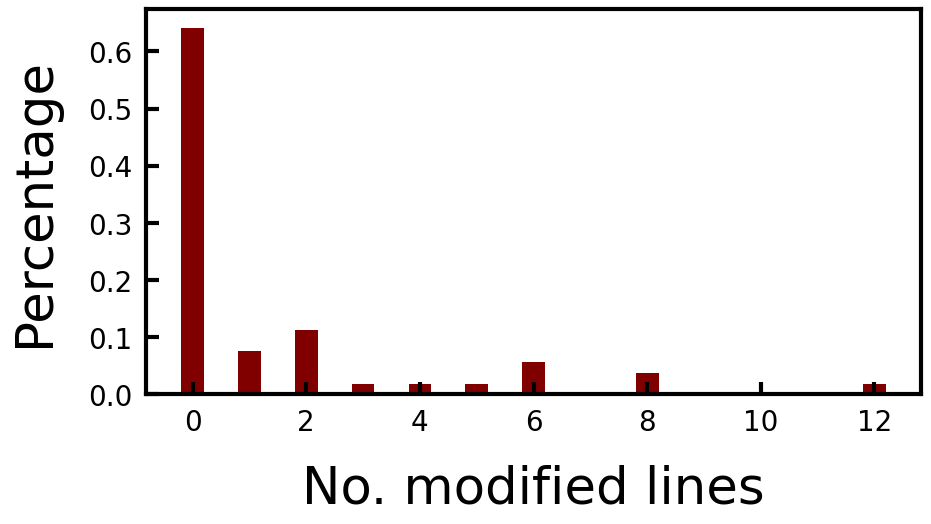

In [126]:
num_updates_pure_lst, a, d, m = find_diff_across_gens('DIRECT_GENERATED_', 'CODES_AFTER_COT_')
entire_added_lst.append(a)
entire_deleted_lst.append(d)
entire_modified_lst.append(m)


xlabel = "No. modified lines"
ylabel = "Percentage"
title = "The percentage of codes that have each specific number of modified lines of codes"
title = ''
save_as = 'RQ2_STEP1_TO_STEP_2'

x = num_updates_pure_lst
make_plot_of_counts(x, xlabel, ylabel, title, save_as)


3.547169811320755
2.3773584905660377
5.9245283018867925


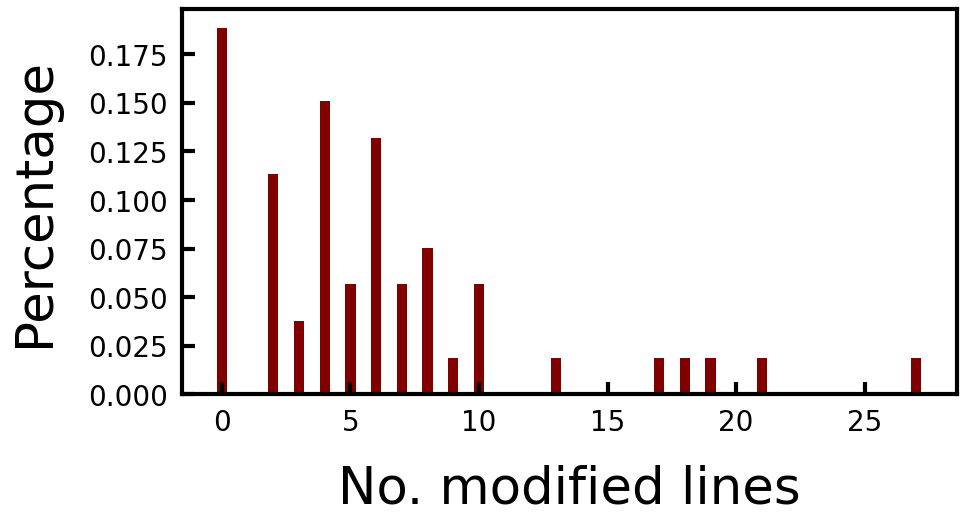

In [127]:
num_updates_pure_lst, a, d, m = find_diff_across_gens('DIRECT_GENERATED_', 'CODES_AFTER_FEW_SHOT_EXAMPLE_')
entire_added_lst.append(a)
entire_deleted_lst.append(d)
entire_modified_lst.append(m)

xlabel = "No. modified lines"
ylabel = "Percentage"
title = "The percentage of codes that have each specific number of modified lines of codes"
title = ''

save_as = 'RQ2_STEP1_TO_STEP_3'

x = num_updates_pure_lst
make_plot_of_counts(x, xlabel, ylabel, title, save_as)

3.0
2.188679245283019
5.188679245283019


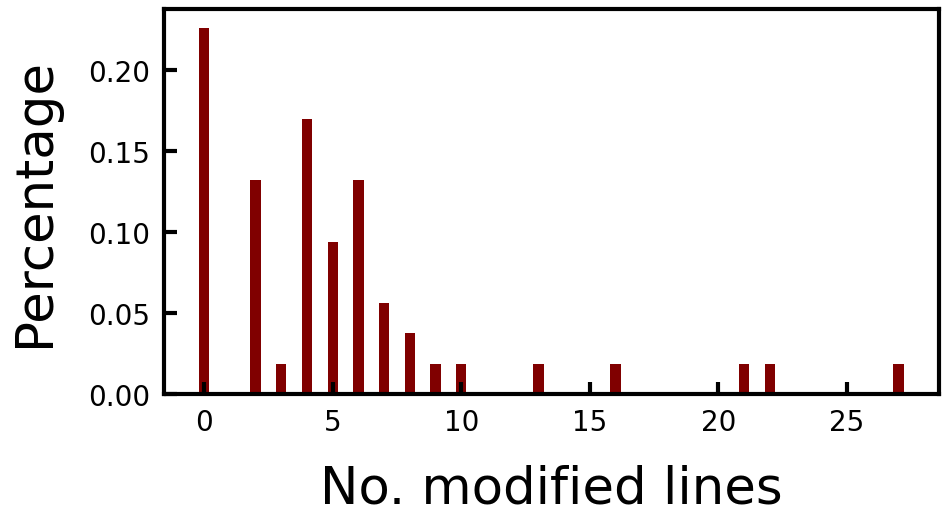

In [128]:
num_updates_pure_lst, a, d, m = find_diff_across_gens('CODES_AFTER_COT_', 'CODES_AFTER_FEW_SHOT_EXAMPLE_')
entire_added_lst.append(a)
entire_deleted_lst.append(d)
entire_modified_lst.append(m)

xlabel = "No. modified lines"
ylabel = "Percentage"
title = "The percentage of codes that have each specific number of modified lines of codes"
title = ''

save_as = 'RQ2_STEP2_TO_STEP_3'

x = num_updates_pure_lst
make_plot_of_counts(x, xlabel, ylabel, title, save_as)

4.377358490566038
3.169811320754717
7.547169811320755


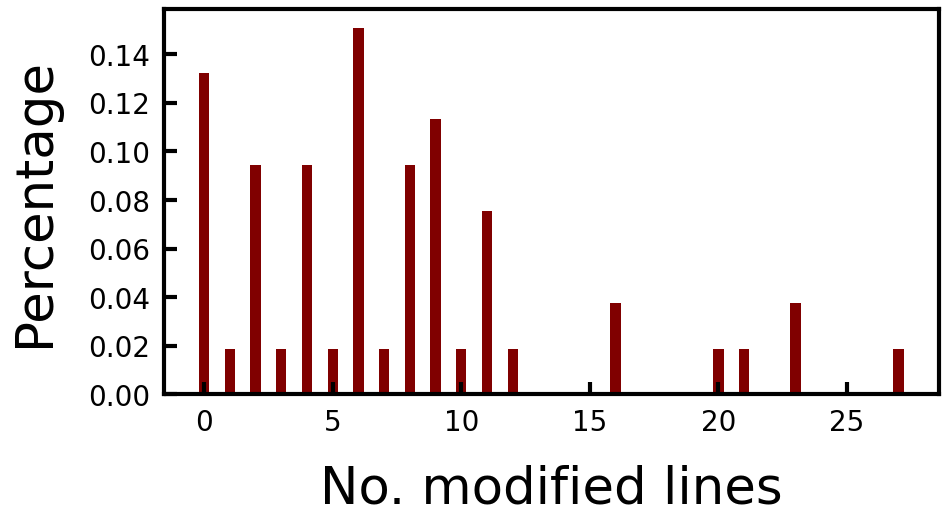

In [129]:
num_updates_pure_lst, a, d, m = find_diff_across_gens('DIRECT_GENERATED_', 'CODES_AFTER_CALLED_SIMILAR_FN_')
entire_added_lst.append(a)
entire_deleted_lst.append(d)
entire_modified_lst.append(m)

xlabel = "No. modified lines"
ylabel = "Percentage"
title = "The percentage of codes that have each specific number of modified lines of codes"
title = ''


save_as = 'RQ2_STEP1_TO_STEP_4'

x = num_updates_pure_lst
make_plot_of_counts(x, xlabel, ylabel, title, save_as)

3.9056603773584904
3.0377358490566038
6.943396226415095


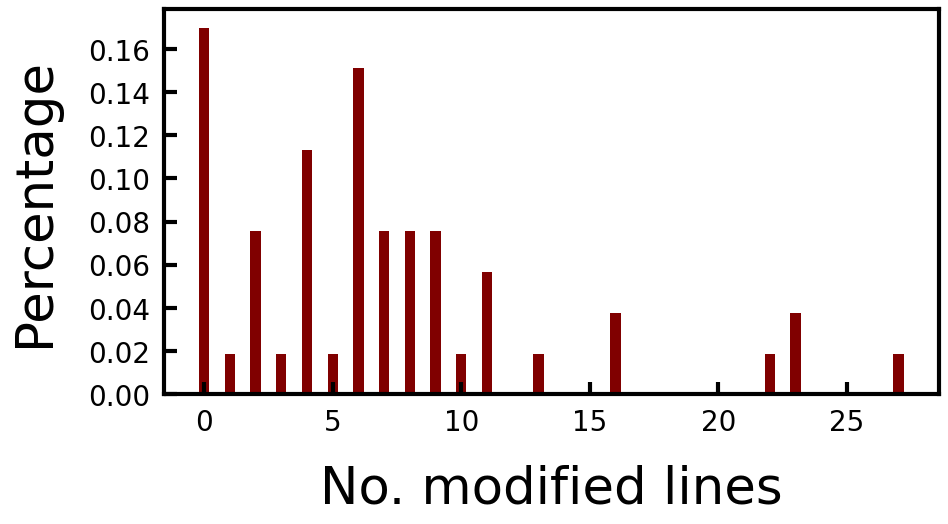

In [130]:
num_updates_pure_lst, a, d, m = find_diff_across_gens('CODES_AFTER_COT_', 'CODES_AFTER_CALLED_SIMILAR_FN_')
entire_added_lst.append(a)
entire_deleted_lst.append(d)
entire_modified_lst.append(m)

xlabel = "No. modified lines"
ylabel = "Percentage"
title = "The percentage of codes that have each specific number of modified lines of codes"
title = ''
save_as = 'RQ2_STEP2_TO_STEP_4'

x = num_updates_pure_lst
make_plot_of_counts(x, xlabel, ylabel, title, save_as)

1.7169811320754718
1.6415094339622642
3.358490566037736


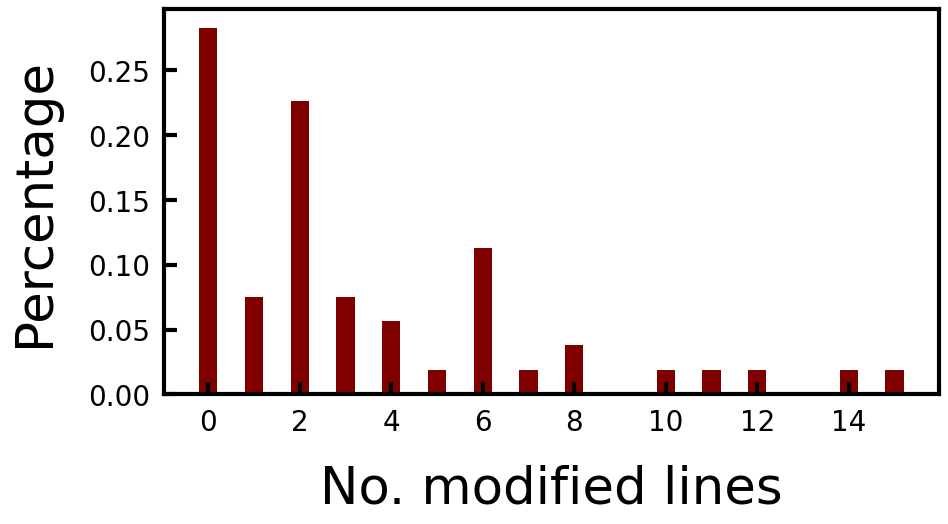

In [131]:
num_updates_pure_lst, a, d, m = find_diff_across_gens('CODES_AFTER_FEW_SHOT_EXAMPLE_', 'CODES_AFTER_CALLED_SIMILAR_FN_')
entire_added_lst.append(a)
entire_deleted_lst.append(d)
entire_modified_lst.append(m)

xlabel = "No. modified lines"
ylabel = "Percentage"
title = "The percentage of codes that have each specific number of modified lines of codes"
title = ''
save_as = 'RQ2_STEP3_TO_STEP_4'

x = num_updates_pure_lst
make_plot_of_counts(x, xlabel, ylabel, title, save_as)

In [101]:
np.average(entire_added_lst)

2.90251572327044

In [102]:
np.average(entire_deleted_lst)

2.157232704402516

In [103]:
np.average(entire_modified_lst)

5.0597484276729565

In [104]:
entire_modified_lst

[1.3962264150943398,
 5.9245283018867925,
 5.188679245283019,
 7.547169811320755,
 6.943396226415095,
 3.358490566037736]

In [57]:
print(num_updates_pure_lst)

[1, 12, 4, 2, 0, 3, 1, 2, 3, 0, 4, 0, 2, 3, 6, 1, 0, 1, 14, 3, 11, 0, 2, 0, 2, 0, 11, 3, 2, 2, 1, 0, 1, 0, 5, 0, 4, 4, 3, 1, 0, 1, 2, 0, 4, 3, 8, 4, 7, 4, 0, 11, 1]


In [ ]:
# RQ2: evolvement along each step



In [ ]:
find_diff_across_gens('DIRECT_GENERATED_', 'CODES_AFTER_FEW_SHOT_EXAMPLE_')

In [31]:
[i for i in d if i not in c]

[]

In [ ]:
# get a figure of the distribution of how many files are modified (using the cdf figure)

In [24]:
list_of_long_enough_functions = ['dispatch',
 'redeemFresh',
 'accrueInterest',
 '_oneInchTrade',
 'liquidateBorrowFresh',
 'transferTokens',
 'seizeInternal',
 'propose',
 'borrowFresh',
 'repayBorrowFresh',
 '_reduceReservesFresh',
 'mintFresh',
 'swap',
 'safeTransferFrom',
 '_upgradeToAndCallSecure',
 'getPriorVotes',
 'safeApprove',
 'safeTransfer',
 'initialize',
 '_setInterestRateModelFresh',
 'state',
 'verifyCallResult',
 'castVoteInternal',
 'callAndTransfer1155',
 'exchangeRateStoredInternal',
 '_addReservesFresh',
 '_calcRateFromQty',
 'callAndTransfer721',
 'borrowBalanceStoredInternal',
 '_setReserveFactorFresh',
 '_acceptAdmin',
 'mulExp',
 'permit',
 '_moveDelegates',
 'getAccountSnapshot',
 '_acceptImplementation',
 'liquidateBorrowInternal',
 '_setComptroller',
 'divScalarByExp',
 '_setPendingAdmin',
 'safeDecreaseAllowance',
 'mod',
 'mint',
 'transferFrom',
 'tryMul',
 'getExp',
 '_callOptionalReturn',
 'functionCallWithValue',
 'mulUInt',
 '_transferTokens',
 'mul',
 '_upgradeBeaconToAndCall',
 'approve']



func_name_key_set = {'_AcceptTimelockAdmin',
 '__ERC1967Upgrade_init',
 '__ERC1967Upgrade_init_unchained',
 '__UUPSUpgradeable_init',
 '__UUPSUpgradeable_init_unchained',
 '_acceptAdmin',
 '_acceptImplementation',
 '_addDao',
 '_addReservesFresh',
 '_addReservesInternal',
 '_authorizeUpgrade',
 '_calcRateFromQty',
 '_callOptionalReturn',
 '_changeAdmin',
 '_delegate',
 '_functionDelegateCall',
 '_fundInvestee',
 '_getAdmin',
 '_getBalance',
 '_getBeacon',
 '_getDecimals',
 '_getImplementation',
 '_initiate',
 '_moveDelegates',
 '_oneInchTrade',
 '_reduceReserves',
 '_reduceReservesFresh',
 '_removeDao',
 '_setAdmin',
 '_setBeacon',
 '_setComptroller',
 '_setImplementation',
 '_setInterestRateModel',
 '_setInterestRateModelFresh',
 '_setInvesteeDetails',
 '_setPendingAdmin',
 '_setPendingImplementation',
 '_setProposalThreshold',
 '_setReserveFactor',
 '_setReserveFactorFresh',
 '_setVotingDelay',
 '_setVotingPeriod',
 '_setWhitelistAccountExpiration',
 '_setWhitelistGuardian',
 '_transferTokens',
 '_upgradeBeaconToAndCall',
 '_upgradeTo',
 '_upgradeToAndCall',
 '_upgradeToAndCallSecure',
 '_writeCheckpoint',
 'abolishSeizing',
 'accrueInterest',
 'add',
 'add256',
 'add96',
 'addDao',
 'addExp',
 'addThenSubUInt',
 'addToWhitelist',
 'addUInt',
 'add_',
 'allowance',
 'approve',
 'balanceOf',
 'balanceOfUnderlying',
 'borrowBalanceCurrent',
 'borrowBalanceStored',
 'borrowBalanceStoredInternal',
 'borrowFresh',
 'borrowInternal',
 'borrowRatePerBlock',
 'callAndTransfer1155',
 'callAndTransfer721',
 'cancel',
 'castVote',
 'castVoteBySig',
 'castVoteInternal',
 'castVoteWithReason',
 'closeTheGates',
 'collectRewards',
 'delegate',
 'delegateBySig',
 'dispatch',
 'div',
 'divExp',
 'divScalar',
 'divScalarByExp',
 'divScalarByExpTruncate',
 'divUInt',
 'div_',
 'exchangeRateCurrent',
 'exchangeRateStored',
 'exchangeRateStoredInternal',
 'execute',
 'fail',
 'failOpaque',
 'fraction',
 'functionCall',
 'functionCallWithValue',
 'functionDelegateCall',
 'functionStaticCall',
 'getAccountSnapshot',
 'getActions',
 'getBlockNumber',
 'getCash',
 'getChainId',
 'getChainIdInternal',
 'getCurrentVotes',
 'getExp',
 'getPoolBalance',
 'getPriorVotes',
 'getReceipt',
 'getValueAndData',
 'greaterThanExp',
 'has',
 'initialize',
 'isContract',
 'isDao',
 'isWhitelisted',
 'isZeroExp',
 'lessThanExp',
 'lessThanOrEqualExp',
 'liquidateBorrowFresh',
 'liquidateBorrowInternal',
 'map',
 'mint',
 'mintFresh',
 'mintInternal',
 'mod',
 'mul',
 'mulExp',
 'mulExp3',
 'mulScalar',
 'mulScalarTruncate',
 'mulScalarTruncateAddUInt',
 'mulUInt',
 'mul_',
 'mul_ScalarTruncate',
 'mul_ScalarTruncateAddUInt',
 'openTheGates',
 'permit',
 'propose',
 'queue',
 'queueOrRevertInternal',
 'redeemFresh',
 'redeemInternal',
 'redeemUnderlyingInternal',
 'remove',
 'removeFromWhitelist',
 'renounceDao',
 'repayBorrowBehalfInternal',
 'repayBorrowFresh',
 'repayBorrowInternal',
 'safe224',
 'safe32',
 'safe96',
 'safeApprove',
 'safeDecreaseAllowance',
 'safeIncreaseAllowance',
 'safeTransfer',
 'safeTransferETH',
 'safeTransferFrom',
 'seize',
 'seizeInternal',
 'sendValue',
 'setOwner',
 'state',
 'sub',
 'sub256',
 'sub96',
 'subExp',
 'subUInt',
 'sub_',
 'supplyRatePerBlock',
 'swap',
 'toUint160',
 'totalBorrowsCurrent',
 'transfer',
 'transferFrom',
 'transferTokens',
 'truncate',
 'tryAdd',
 'tryDiv',
 'tryMod',
 'tryMul',
 'trySub',
 'updateOneInchAddress',
 'upgradeTo',
 'upgradeToAndCall',
 'verifyCallResult'}